In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
data=load_breast_cancer()

In [17]:
df=pd.DataFrame(columns=data.feature_names,data=data.data)
df['target']=data.target

In [18]:
df.shape

(569, 31)

In [19]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
rf=RandomForestClassifier(n_estimators=500,n_jobs=-1)

In [22]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("accuracy of randomForest is",accuracy_score(y_test,y_pred))

accuracy of randomForest is 0.9649122807017544


In [23]:
list=[]
for name,score in zip(data.feature_names,rf.feature_importances_):
    list.append([name,score])
    print(name,score)

mean radius 0.03662984958163738
mean texture 0.01472067275742893
mean perimeter 0.047002139064359676
mean area 0.039011233137783714
mean smoothness 0.007830429823323444
mean compactness 0.012906426270683967
mean concavity 0.045403824355983065
mean concave points 0.12309749080479729
mean symmetry 0.004065861073290779
mean fractal dimension 0.004707841860458088
radius error 0.014470872452872997
texture error 0.0044947880892589566
perimeter error 0.012201073711839122
area error 0.036453912535196205
smoothness error 0.003758158893030224
compactness error 0.004264145072555623
concavity error 0.006819959587429947
concave points error 0.004641490238939697
symmetry error 0.0046854778743575295
fractal dimension error 0.0061352888012458215
worst radius 0.08195151229202445
worst texture 0.021007321525158287
worst perimeter 0.1341899473120079
worst area 0.10536907275695837
worst smoothness 0.012304782646062237
worst compactness 0.015114231092065023
worst concavity 0.039463325775831566
worst concav

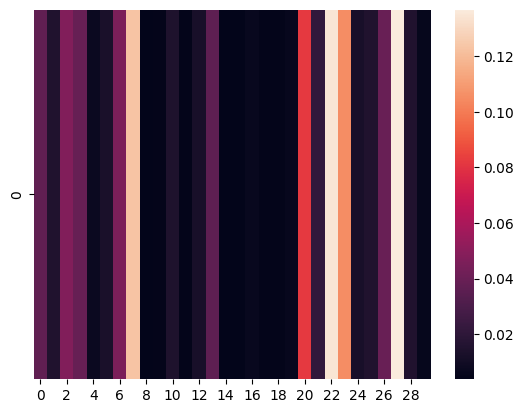

In [24]:
import seaborn as sns
sns.heatmap(rf.feature_importances_.reshape(1,30));

In [25]:
sorted_data = sorted(list, key=lambda x: x[1], reverse=True) # importance of the features inthe descending order

In [26]:
adaboost=AdaBoostClassifier()
adaboost.fit(X_train,y_train)

C:\Users\sy669\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [27]:
y_pred=adaboost.predict(X_test)
print("accuracy of adaboost is",accuracy_score(y_test,y_pred))

accuracy of adaboost is 0.9736842105263158


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid={
    'n_estimators':[50,100,200,500],
    'learning_rate':[0.1,0.3,0.6,1.0],
    'algorithm':['SAMME','SAMME.R']
}

In [30]:
grid_search=GridSearchCV(estimator=adaboost,param_grid=param_grid,n_jobs=-1,cv=10,scoring='accuracy')

In [31]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.3, 0.6, 1.0],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [32]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 500}
Best Accuracy: 0.9846376811594203


In [33]:
best_model=grid_search.best_estimator_
accuracy=best_model.score(X_test,y_test)
print(accuracy)

0.9736842105263158


In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.956140350877193

In [35]:
import joblib
joblib.dump(adaboost,'brest_cancer_prediction.pkl')

['brest_cancer_prediction.pkl']